# <center> Estatistica Inferencial Basica em Python </center>

## Basic ToolBox - Estatistica Inferencial I

A ``estatística Inferencial``  ou ``Inferência estatística``, é um ramo da Estatística que tem como foco, **realizar afirmações** a partir de um **conjunto de dados representativo**,  assume-se que a **população é muito maior** do que o conjunto de **dados observados**, a **amostra**, esta parte da estatística,  preocupa-se com o **raciocínio necessário** para, a **partir dos dados**, se **obter conclusões gerais**. O seu objectivo é **obter uma afirmação** acerca de uma **população** com base numa **amostra**.

Um dos principais objetivos da ``estatística Inferencial`` é, estudar as relações entre possíveis variáveis, que podem contribuir para o efeito final.

De modo a simplificar o entendimento, vejamos um exemplo na aplicação da ``estatística inferencial``: 

* Se você deseja saber se a altura média dos alunos da escola é maior do que a altura média dos alunos de outra escola, a estatística inferencial pode ser usada para testar essa hipótese

``Inferência Estatística``: Técnicas por meio das quais são tomadas decisões sobre uma **população** com base na **observação de uma amostra**.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from scipy.stats import bernoulli

## Amostragem

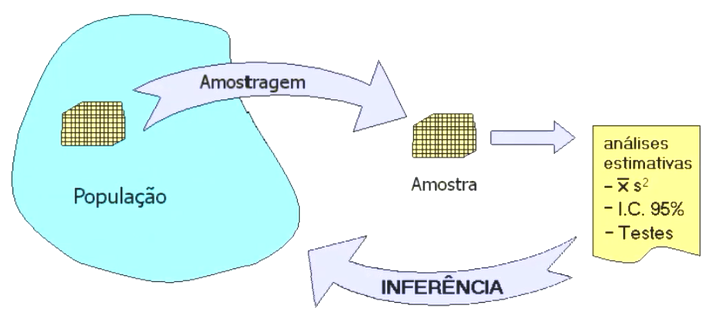

``Estatística Inferencial``: é um **conjunto de técnicas** que possibilita **extrair conclusões** sobre uma **população**, a partir de um subconjunto de valores (**amostra**). No processo de amostragem, o que interessa é, garantir **representabilidade**

``Amostragem`` é a **seleção** de um **subconjunto** ou uma ``amostra estatística`` de **indivíduos** dentro de uma ``população estatística`` para **estimar as características** de toda a população. 

De uma visão mais generalizada, a ``amostragem`` é o processo para se obter apenas **alguns membros de uma população**, de forma que, seja possível realizar análises e chegar em conclusões, sobre a **população inteira**. Em outras palavras, a ``amostragem`` é uma parte da **população** que permite **concluir e caracterizar a população inteira**.

Estamos realizando amostragem quando:

* Experimentamos um pouco de comida para descobrir se está salgado demais
* Bebemos um pequeno gole de café para descobrir se está muito quente

Mas por qual motivo realizar uma amostragem é tão importante?

Se utilizar de uma ``amostra``  poder se **inferir características da população** que a originou. Mas por qual motivo não utilizamos a população?

Alguns motivos para que desejemos extrair amostras:

- A coleta pode ser destrutiva
- Coleta impossível
- Coleta muito cara

Como fazer ? Existem alguns tipos de amostragem. 

Duas delas são bastante utilizadas:

### Amostragem ``Aleatória``

Na ``amostragem aleatória``, **não olhamos** pra qualquer **característica dos dados**. Tomamos uma decisão, de fato, completamente aleatória ao escolher os **dados da amostra**.

<img src=https://cdn2.vectorstock.com/i/1000x1000/65/31/simple-random-sampling-method-in-statistics-vector-28746531.jpg height=400 width=400>

### Amostragem  ``Estratificada``

A ``amostragem estratificada`` é um método de **amostragem de uma população** que pode ser **dividida em subpopulações**, este método consiste em **especificar quantos elementos da amostra** serão retirados em **cada estrato**. É costume considerar três tipos de ``amostragem estratificada``: **uniforme**, **proporcional** e **ótima**.

Quando alguma **características da população** é muito **importante** queremos **garantir** que possua **representatividade na amostra**

<img src=https://thumbs.dreamstime.com/z/método-de-amostragem-estratificado-nas-estat%C3%ADsticas-investigação-sobre-recolha-dados-por-em-técnicas-pesquisa-cient%C3%ADfica-168640347.jpg height=400 width=400>

## Lei dos Grandes Números

A ``lei dos grandes números (LGN)`` é um teorema fundamental da **teoria da probabilidade**, que descreve o resultado da realização da mesma experiência repetidas. A ``lei dos grandes números`` fala que quanto mais experimentos fizermos, mais próximos da **média real/teórica** (valor esperado) chegaremos

A ``Lei dos Grandes Números`` diz que, a **média aritmética** dos resultados da realização da **mesma experiência repetidas vezes** tende a se **aproximar do valor esperado** à medida que **mais tentativas** se sucederem.

<img src="https://justflipacoin.com/img/share-a-coin.png" width=300 height=300>

Baseando-se na imagem abaixo, que lado da moeda  escolher ? Cara ou Coroa??? Por qual motivo??

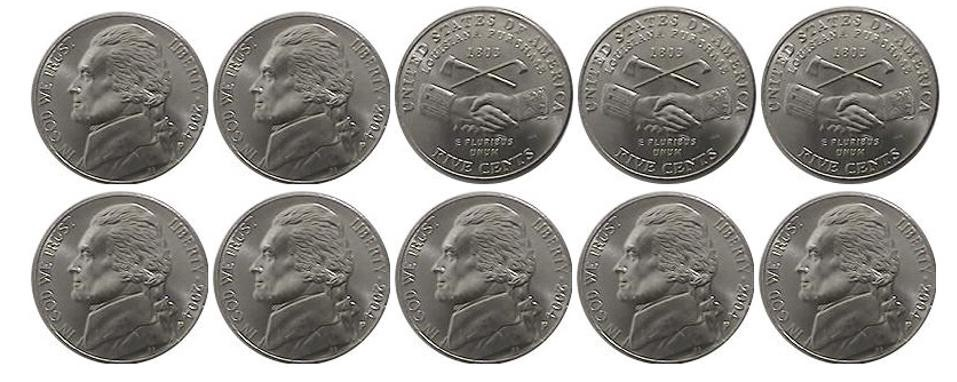

In [2]:
# probabilidade de sucesso
p = 0.5

# numero de lançamentos em um trial (ensaio)
max_lancamentos = 10000

# Atribuindo a uma variavel os resultados obtidos 
resultado_experimento = []

# Criando um looping para os laçamentos
for i in range(1,max_lancamentos+1):
    
    # Aplicando uma Distribuição de Bernoulli para Sucesso ou Fracasso
    bernoulli_dist = bernoulli.rvs(p=p, # probabilidade de sucesso
                               size=i, # numero de experimentos
                               loc=0) # fracasso
    resultado_experimento.append(bernoulli_dist.mean())

In [3]:
n_lancamentos = np.arange(1,max_lancamentos+1)

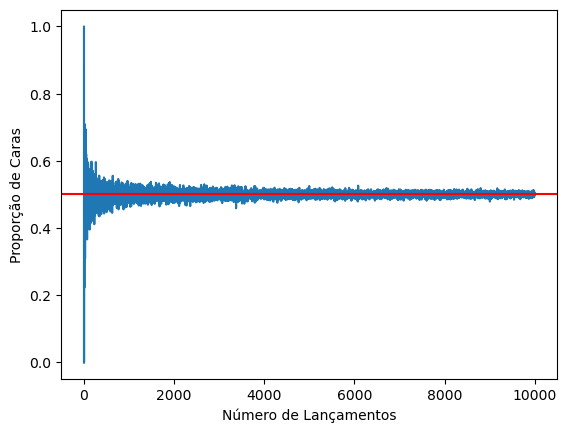

In [4]:
plt.plot(n_lancamentos, resultado_experimento)
plt.xlabel('Número de Lançamentos')
plt.ylabel('Proporção de Caras')
plt.axhline(0.5, color='red')
plt.show()

Note que, quanto mais lançamentos fazemos, mais próximo de ``0.5`` se aproxima a **média de ocorrências de Caras**.

## Teorema do Limite Central

O ``Teorema Central do Limite (TCL)`` afirma que, a **soma** (``S``) do **numero total** (``N``) de **variáveis aleatórias independentes** (``X``), com qualquer **distribuição e variâncias** semelhantes, é uma **variável com distribuição** que se aproxima da **distribuição de Gauss** (``distribuição normal``) quando ``N`` **aumenta**.

A **média** de ``S`` é o **somatório das médias** de ``X``. A **variância** de ``S`` das **variâncias** de ``X``.

In [5]:
mu = 3
sigma = 2
dist = np.random.lognormal(mu, sigma, 50000)

In [6]:
# media da distribuição
dist.mean()

146.97803099940262

De modo a exemplificar,  iremos **coletar diversas amostras** de tamanhos diferentes, ``n`` vezes. Ou seja, vamos **repetir o experimento** de amostragem ``n`` vezes.

De cada ``n`` amostras de tamanhos distintos, vamos **extrair a média** e observar sua distribuição.

In [7]:
sizes = [10, 20, 30, 40, 1000, 30000]
distributions_means = []
for s in sizes:
    d = []
    for n in np.arange(1000):
        d.append((np.random.choice(dist, s)).mean())
    distributions_means.append(d)

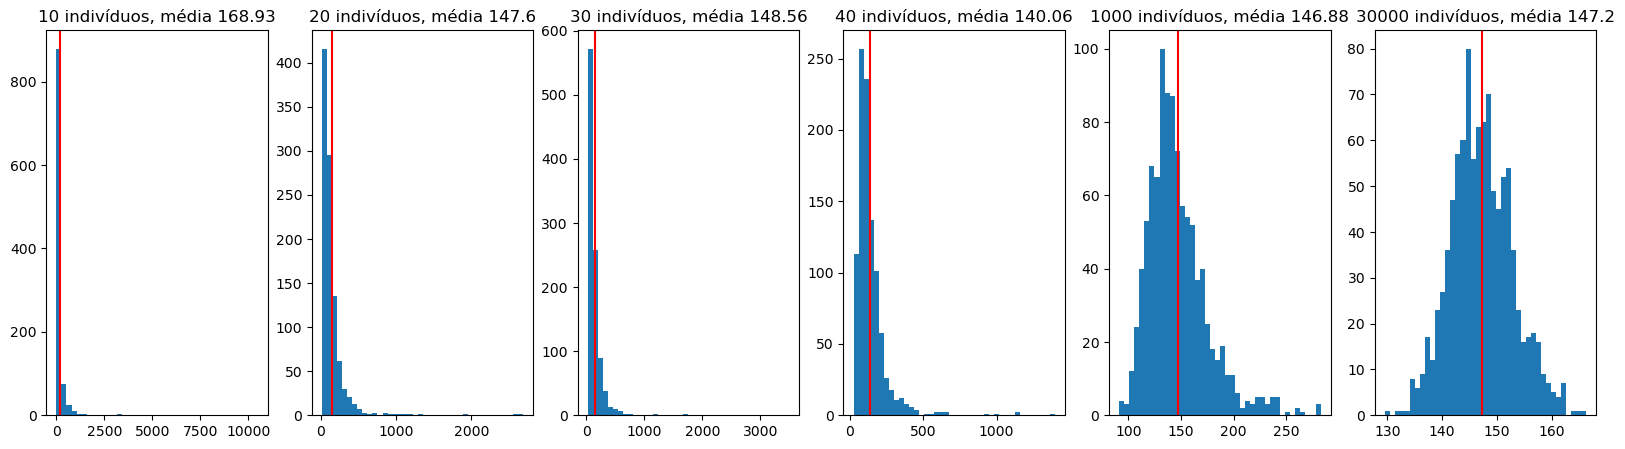

In [8]:
fig, ax = plt.subplots(1,6, figsize=(20,5))
for l in np.arange(6):
    m = round(np.mean(distributions_means[l]),2)
    ax[l].hist(distributions_means[l], bins=40)
    ax[l].axvline(m, color='red')
    ax[l].set_title(f'{sizes[l]} indivíduos, média {m}')

![](https://cdn1.byjus.com/wp-content/uploads/2019/08/central-limit-theorem-formula.jpeg)

A **média da distribuição amostral** é igual a **média populacional** e o **desvio padrão amostral** é igual ao **desvio padrão populacional**,  **dividido pela raiz do número de elementos** na amostra.

In [9]:
# média da população
dist.mean()

146.97803099940262

In [10]:
# desvio padrao da população
dist.std()

925.5161943974848

In [11]:
# Desvio padrão populacional calculado a partir do amostral
np.std(distributions_means[5])*np.sqrt(30000)

970.0762275413869

In [12]:
np.mean(distributions_means[5])

147.19996004509082

## Intervalo de Confiança


Um ``intervalo de confiança`` é uma **amplitude de valores**,  que têm a **probabilidade de conter** o valor de um parâmetro **populacional** desconhecido. Devido à sua natureza aleatória, é improvável que duas amostras de uma determinada população irá render ``intervalos de confiança`` idênticos.

``Intervalo de confiança`` é um **intervalo numérico** (de um **parâmetro populacional**, como a média ou o desvio-padrão), associado a uma **probabilidade** (o nível de confiança), que representa a **confiança de que o intervalo contém o parâmetro**.

Baseado na **distribuição amostral**, queremos obter uma **faixa de valores** (``intervalo de confiança``) com uma determinada **probabilidade** (``nível de confiança``) de conter o parâmetro populacional em questão. O ``intervalo de confiança`` é uma medida estatística que fornece uma medida de incerteza para ajudar a **avaliar a precisão e a confiabilidade** das estimativas.

O ``intervalo de confiança`` é expresso em **porcentagem**, denominadas por ``nível de confiança``, sendo **90%, 95%** e **99%** as mais indicadas.

O ``nível de confiança`` refere-se à **taxa de sucesso** em longo prazo do método, ou seja, com que **frequência esse tipo de intervalo vai capturar o parâmetro de interesse**. Um ``intervalo de confiança`` específico fornece uma **amplitude de valores plausíveis** para o parâmetro de interesse.

``Nível de Confiança`` é o **valor da probabilidade associado** com um ``intervalo de confiança`` ou um **intervalo de tolerância** estatística, ou seja, **probabilidade** de que um **determinado intervalo de confiança**, calculado a partir de um valor amostral, **contenha o verdadeiro valor da população**.

A estatística que estamos estudando é baseada em experimentos e amostras. As estimativas que criamos a partir de uma única amostra são pontuais.

Mas e se tivéssemos a oportunidade de repetir a coleta dessa amostra várias e várias vezes? Será que obteríamos os mesmos resultados?

Provavelmente não.

Nesse contexto, o Intervalo de Confiança surge como uma forma de se obter uma faixa de valores, dentro da qual a característica de interesse se encontra, com um dado nível de confiança.

### Exemplo prático

Em uma companhia aérea temos **um vôo com 368 assentos**, com um **número de passagens vendidas** de **n=400**. Sendo que a **probabilidade** de **no-show** é de **10%**, e o **custo de um passageiro** excedente é de **1.000,00 Reais**, com **0.95 de confiança**, qual é a exposição financeira total da empresa aérea?

In [13]:
# identificando os dados
n=400 # número de passagens vendidas
p=0.1 # probabilidade de no show
risco_p_passageiro = 1000
assentos=368 # No. de assentos do avião

In [14]:
# Calculando a média:
media_show = (1-p)*n
print('média =', media_show)

# Cálculo do desvio-padrão 
std_amostral = (n*p*(1-p))**0.5
print('desvio-padrão =', std_amostral)

média = 360.0
desvio-padrão = 6.0


In [15]:
# calculando e imprimindo o intervalo de confiança
int_inferior = media_show - 1.96*std_amostral
int_superior = media_show + 1.96*std_amostral
print('Intervalo de confiança:', int_inferior, '<-->', int_superior)

Intervalo de confiança: 348.24 <--> 371.76


In [16]:
# calculando e imprimindo o risco financeiro
risco = ( int_superior - assentos ) * risco_p_passageiro
print ('Risco financeiro total =',risco)

Risco financeiro total = 3759.999999999991


### Testes de Hipóteses

O que é um ``Teste de Hipótese``,

``Teste de hipóteses``, **teste estatístico** ou **teste de significância** é um procedimento estatístico que **permite tomar uma decisão** entre **duas ou mais hipóteses**, utilizando os **dados observados** de um determinado experimento

Um ``teste de hipóteses`` consiste em verificar, a partir das **observações de uma amostra**, se uma **afirmação** (denominada ``hipótese``) sobre a **distribuição de uma ou mais variáveis** de determinada população em estudo é verdadeira ou não. Nos permite verificar se os **dados amostrais trazem evidência** que **apoiem ou não uma hipótese** estatística formulada.

Como falado anteriormente, muitas vezes é impossível obter a população inteira. Dessa forma, precisamos trabalhar com uma **amostra**, uma parte pertencente ao todo!

Às vezes queremos ou precisamos **comparar populações** ou temos **alguma hipótese** sobre os **parâmetros de uma população** e tudo que temos são **amostras**. Pois bem, o ``teste de hipótese`` nos fornece uma metodologia para que, a partir das **evidências** trazidas pela **amostra**, possamos **concluir** algo **sobre a população**.

Um exemplo simples
Uma certa reportagem de TV falou que o salário médio de um Cientista de Dados é 20 mil Reais.

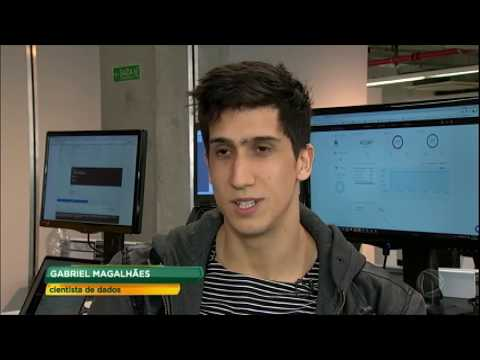

In [17]:
from IPython.display import YouTubeVideo

YouTubeVideo('8ehOGQEd8UQ', width=800, height=300)

Será que é verdade?

Você decide procurar no Glassdoor qual que é a média salarial para esse cargo. Dessa forma, você possui agora uma média amostral que aponta que o salário médio é 15 mil. E agora? Qual o real salário? Será que o valor obtido, 15 mil reais, não foi fruto do processo de amostragem?

## Erro tipo I & Erro do Tipo II

Em Estatística, um ``erro do tipo I`` consiste em, num **testes de hipóteses**, **rejeitar a hipótese nula** quando ela é **verdadeira e absoluta**. Por outras palavras, comete-se um ``erro do tipo I`` quando se chega a um resultado que tem **significância estatística* quando na **verdade ele aconteceu por acaso**

O ``erro de tipo II``, corresponde à probabilidade de **não rejeitar** ``H₀`` quando ela é falsa, ou seja, **não detectar um efeito quando ele existe**. 

Em resumo, quando se **rejeita algo que é verdadeiro**, está cometendo um ``erro do tipo I``. E quando **não está rejeitando algo falso**, está cometendo um ``erro tipo II``

Mesmo realizando um **teste de hipótese**, podemos chegar à conclusões erradas. Para o nosso exemplo, vamos **estabelecer 2 hipóteses**:

``Hipótese 0`` (também chamada de **hipótese nula**), é a **afirmação** que fazemos a respeito do **parâmetro populacional**. No nosso caso, nossa hipótese é que o salário é 20 mil Reais.

``Hipótese 1`` (também chamada de **hipótese alternativa**), é a hipótese que iremos **adotar**, caso a **hipótese 0**, inicial, **não se sustente** estatísticamente.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQAxinK5rj3TUMHsLCblMOqULBXe7eGYKKN2g&usqp=CAU)


* ``Erro Tipo I``: **Rejeitar** a ``H0`` quando ela é **verdadeira**
* ``Erro Tipo II``: **Aceitar** ``H0`` quando ela é **falsa**

O ``nível de significância``, **Alfa**, vai ser a **probabilidade** de cometermos ``erro do tipo I``.

* **Alfa** = ``5%``
* **Alfa** = ``1%``

A **área** que **corresponde à probabilidade** de ``5%`` é conhecida como **região crítica**

Para o ``erro tipo II``, o que **influencia é o tamanho da amostra** e o tamanho do **efeito a ser observado**.

Quanto **maior o tamanho da amostra**, **menor a variância**, como vimos de acordo com o TLC(Teorema do Limite Central). Menos achatada é a curva e menos sobreposição. Da mesma forma, quanto maior for o tamanho do efeito que se queira observar, **menor a probabilidade** de ``erro tipo II``.

Se continuamos com o mesmo tamanho de amostra e diminuímos a probabilidade de ``erro tipo I``, automaticamente aumentamos a probabilidade de ``erro tipo II``.

## P- valor

Quem é o p-valor?

O ``valor-p``, é a **probabilidade** de se obter uma **estatística de teste igual ou mais extrema que aquela observada** em uma amostra, sob a **hipótese nula**. Por exemplo, em testes de hipótese, pode-se rejeitar a hipótese nula a 5% caso o valor-p seja menor que 5%

O cálculo gira em torno de descobrir qual é a probabilidade de observamos uma estatística ou efeito tão grande quanto o que estamos observando na nossa amostra, dada que a hipótese nula é verdadeira.

* Se ``p-value`` <= ``nível de significância``, **rejeitamos a hipótese nula** e **aceitamos a hipótese alternativa**
* Se ``p-value`` > ``nível de significância``, **não temos evidência** suficiente para **rejeitar a hipótese nula**.